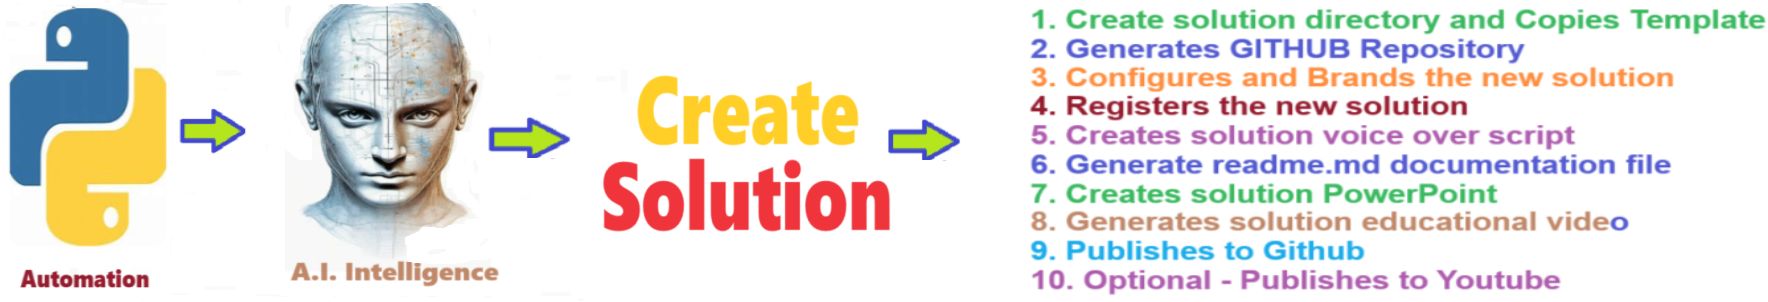

The **Create Solution** application streamlines development by generating a customizable solution template, which is then tailored and configured to specific project requirements. Following customization, it seamlessly initiates Git version control and pushes the configured solution to GitHub, ensuring efficient collaboration and version management within the development workflow.

# Process for creating a new solution: 
1. Create solution directory and copies template
2. Generates GITHUB repository 
3. Configures and brands the new solution 
4. Registers the new solution 
5. Creates solution voice over script
6. Generate readme.md documentation file  
7. Creates solution PowerPoint 
8. Generates solution educational video  
9. Publishes to Github
10. Optional - Publishes to Youtube
 
#### by Joe Eberle started on 05-23-2023 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd
import subprocess
import shutil
import time
import zipfile
from github import Github
from github import GithubException
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-05-03 at 13:51:10.062753


## Required setup Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'create_solution'

## Required setup Step 0 - Intitiate Logging and debugging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process create_solution Step 0 - Initializing and starting Logging Process.


In [4]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
df_solution_registry = pd.read_excel(path_to_solutions_registry) 
print(f"The are {df_solution_registry.shape[0]} registered solutions") 
df_solution_registry.head(2) 

The are 116 registered solutions


,Unnamed: 0,solution_name,solution_directory,solution_definition,solution_description
0,0,Archival Automation,archival_automation,Archival Automation automatically backs up you...,Archival Automation automatically backs up you...
1,1,Automated Application Launcher,automated_application_launcher,Automated Application Launcher launches any ap...,Automated Application Launcher launches any ap...


In [26]:
def add_new_solution_to_registry(df, solution_name, solution_directory, solution_definition, solution_description ):
    """ Add a new row to an existing DataFrame .  """
    new_index = len(df)
    df.loc[new_index] = [solution_name, solution_directory, solution_definition, solution_description]
    return df

In [25]:
def persist_registry(df_solution_registry):
    path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
    df_solution_registry = df_solution_registry.sort_values(by='solution_directory')
    df_solution_registry.to_excel(path_to_solutions_registry, index=None ) 
    path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.parquet"    
    df_solution_registry.to_parquet(path_to_solutions_registry, index=None )     
    print(f"The are {df_solution_registry.shape[0]} registered solutions") 

persist_registry(df_solution_registry)

The are 116 registered solutions


In [7]:
df_solution_registry.tail(10)

,Unnamed: 0,solution_name,solution_directory,solution_definition,solution_description
106,101,Talking Code Library,talkingcode,A library .py file for text to speech,A library .py file for text to speech
107,102,Task Scheduling,task_scheduling,Schedules tasks and executes runtimes,Schedules tasks and executes runtimes
108,103,term_frequency_inverse_document_frequency,term_frequency_inverse_document_frequency,TF-IDF helps identify important terms within a...,TF-IDF helps identify important terms within a...
109,104,titanic_survival_analysis,titanic_survival_analysis,titanic_survival_analysis,titanic_survival_analysis
110,105,Unzip Automation,unzip_automation,Solution for Unzip Automation,Solution for Unzip Automation
111,106,Update Solution Images,update_solution_images,Provide a set of images designed to brand and ...,Provide a set of images designed to brand and ...
112,107,Updating Libraries,updating_libraries,Makes sure the LATEST technology is used.,Makes sure the LATEST technology is used.
113,108,Web Automation,web_automation,Solution for Web Automation,Solution for Web Automation
114,109,Word Cloud,word_cloud,Produces a wordcloud using the3 most relevant ...,Produces a wordcloud using the3 most relevant ...
115,110,World Mood,world_mood,Solution for World Mood,Solution for World Mood


In [8]:
def get_API_Key():
    gh1 = 'ghp_15f13JKp'
    gh2 = 'BLj7Vp0GPJjY'
    gh3 = 'wnSKhaYRRT0ZAne8'
    return  gh1 + gh2 + gh3 

In [9]:
def add_github_repo(repo_name, description, API_key):
    """  Creates a new remote GitHub repository with the specified name and description."""
    try:
        g = Github(API_key)  # Initialize PyGithub client
        user = g.get_user() # Attempt to create the repository
        user.create_repo(name=repo_name, description=description)
        return f"New repo '{repo_name}' created successfully."
    except GithubException as e:
        if e.status == 422:
            return f"Failure Repo '{repo_name}' already exists."
        else:
            return f"Error: {e}"

In [10]:
path_to_solution_library = "c:\\users\\josep\\" 
path_to_solution_template = "c:\\users\\josep\\solution_template" 

In [11]:
def generate_readme_intro(solution_name, solution_description, target_directory):
    solution_name = solution_name.replace('_',' ').title()
    return f"""
# {solution_name} - {solution_description}

![Code Logo](code.png)
## Description

Welcome to the solution **{solution_name}** - an example for your projects

{solution_description}
    """

In [12]:
def generate_readme_solution_features():
    return f"""
## Features
- Easy to understand and use  
- Easily Configurable 
- Quickly start your project with pre-built templates
- Its Fast and Automated
    """

In [13]:
def generate_readme_instructions(solution_name):
    return f"""
## Getting Started
To get started with the **{solution_name}** solution, follow these steps:
1. Clone the repository to your local machine.
2. Install the required dependencies listed at the top of the notebook.
3. Explore the example code provided in the repository and experiment.
4. Run the notebook and your find your most Critical Data - EASY !
    """

In [14]:
def generate_readme_notebook_features():
    return f"""
## Notebook Features
- Self Documenting 
- Self Testing 
- Easily Configurable
- Includes Talking Code - The code explains itself
- Self Logging 
- Self Debugging 
- Low Code - or - No Code
- Educational 
    """

In [15]:
def generate_readme_branding():
    return f"""
![Code Logo](developer.png)
    """

In [16]:
def generate_readme(solution_name, solution_description, target_directory):
    """ Generate a readme.md file.   """
    solution_name = solution_name.replace('_',' ').title()
    readme_content = generate_readme_intro(solution_name, solution_description, target_directory)
    readme_content += generate_readme_solution_features()  
    readme_content += generate_readme_notebook_features()  
    readme_content += generate_readme_instructions(solution_name)      
    readme_content += generate_readme_branding()     

    if not os.path.exists(target_directory):      # Create the target directory if it doesn't exist
        os.makedirs(target_directory)

    readme_path = os.path.join(target_directory, 'readme.md')     # Specify the path for the readme.md file

    with open(readme_path, 'w') as f:      # Write the template to the readme.md file
        f.write(readme_content)

    result = f"{readme_path}'" 
    return result 

In [17]:
def initialize_solution_git(new_solution_name, solution_path="C:\\users\\josep\\"):
    """ Initialize a Git repository for a solution.  """
    commit_date = datetime.today().strftime('%Y-%m-%d')
    project_full_path = solution_path + new_solution_name + '\\'
    remote_git_location = f"https://github.com/JoeEberle/{new_solution_name}.git"
    
    subprocess.run(["git", "-C", project_full_path, "init"])  
    subprocess.run(["git", "-C", project_full_path, "add", "."])    
    subprocess.run(["git", "-C", project_full_path, "commit", "-m", f"Automated {commit_date} commit"])
    subprocess.run(["git", "-C", project_full_path, "branch", "-m", "main"])  # Set default branch to main
    subprocess.run(["git", "-C", project_full_path, "remote", "add", "origin", remote_git_location])    
    subprocess.run(["git", "-C", project_full_path, "push", "-u", "origin", "main"])  # Set default branch to main
    
    git_init_status = f"Initialized project git folder: {solution_name} repository"  
    print(git_init_status) 
    return git_init_status

In [18]:
def create_solution(new_solution_name, new_solution_definition, path_to_solution_library,path_to_solution_template, overwrite = None):
    ''' Clone a solution template to kick start a new solution '''
    path_to_new_solution = path_to_solution_library + new_solution_name + "\\"
    if os.path.exists(path_to_new_solution) and os.path.isdir(path_to_new_solution):
        task_progress = f"Cannot create solution that already has directory:\n{path_to_new_solution} " 
    else:
        result = add_github_repo(new_solution_name, new_solution_definition,  get_API_Key())
        print(result)
        shutil.copytree(path_to_solution_template, path_to_new_solution)
        task_progress = f"1. Created directory: {path_to_new_solution} \n"
        task_progress += f"2. Created solution Template \n"    
        new_solution_notebook_name  = f"{path_to_new_solution}\\{new_solution_name}.ipynb"
        os.rename(path_to_new_solution+"\\"+"solution_template.ipynb", new_solution_notebook_name)
        task_progress += f"3.1 Renamed solution to:{new_solution_name}.ipynb \n"           
        new_solution_image_name  = f"{path_to_new_solution}\\{new_solution_name}.png"        
        os.rename(path_to_new_solution+"\\"+"solution_template.png", path_to_new_solution+"\\"+new_solution_name + ".png")
        task_progress += f"3.2 Renamed image to: {new_solution_name}.png \n"          
        readme_result = generate_readme(new_solution_name, new_solution_definition, path_to_new_solution)
        task_progress += f"4. Generated Readme to:\n{readme_result} \n"     
        initialize_solution_git(new_solution_name, path_to_solution_library) 
        task_progress += f"5. Intitialized GIT for:\n{path_to_new_solution} \n"  
        task_progress += f"Create solution steps completed \n" 
    status = task_progress 
    
    return task_progress


In [19]:
df_solution_registry.head()

,Unnamed: 0,solution_name,solution_directory,solution_definition,solution_description
0,0,Archival Automation,archival_automation,Archival Automation automatically backs up you...,Archival Automation automatically backs up you...
1,1,Automated Application Launcher,automated_application_launcher,Automated Application Launcher launches any ap...,Automated Application Launcher launches any ap...
2,2,automating_windows_task_scheduler,automating_windows_task_scheduler,This solution automates creating python script...,This solution automates creating python script...
3,3,Calculator,calculator,Build a simple calulator using python and tkin...,Build a simple calulator using python and tkin...
4,4,Cancer Care Timeline,cancer_care_timeline,Analyzing each patients temporal pathway throu...,Analyzing each patients temporal pathway throu...


In [27]:
def persist_registry(df_solution_registry):
    path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
    df_solution_registry = df_solution_registry.sort_values(by='solution_name')
    df_solution_registry.to_excel(path_to_solutions_registry) 
    print(f"The are {df_solution_registry.shape[0]} registered solutions") 

persist_registry(df_solution_registry)

The are 116 registered solutions


In [21]:
one_time_install = False
if one_time_install:
    new_solution_name = "ai_prompt_generator" 
    new_solution_description = "Produce high quality prompts to get the most out of AI."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description)

In [22]:
one_time_install = False
if one_time_install:
    new_solution_name = "getting_started_with_django" 
    new_solution_description = "Getting Started with Django for Web Application Development."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description)

In [23]:
one_time_install = True
if one_time_install:
    new_solution_name = "create_sign" 
    new_solution_description = "A tiny utility to create PNG signs."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description ,new_solution_description)

Cannot create solution that already has directory:
c:\users\josep\create_sign\ 


ValueError: cannot set a row with mismatched columns

In [24]:
one_time_install = True
if one_time_install:
    new_solution_name = "create_solution_sign" 
    new_solution_description = "A utility to create a new PNG sign for every solution."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description ,new_solution_description)

New repo 'create_solution_sign' created successfully.
Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\create_solution_sign\ 
2. Created solution Template 
3.1 Renamed solution to:create_solution_sign.ipynb 
3.2 Renamed image to: create_solution_sign.png 
4. Generated Readme to:
c:\users\josep\create_solution_sign\readme.md' 
5. Intitialized GIT for:
c:\users\josep\create_solution_sign\ 
Create solution steps completed 



ValueError: cannot set a row with mismatched columns

In [ ]:
one_time_install = False
if one_time_install:
    new_solution_name = "create_solution_definition" 
    new_solution_description = "A utility to create a new PNG sign for every solution."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description ,new_solution_description)

In [28]:
one_time_install = False
if one_time_install:
    new_solution_name = "create_solution_word_cloud" 
    new_solution_description = "A utility to create a word cloud for every solution."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description ,new_solution_description)

In [ ]:
one_time_install = False
if one_time_install:
    new_solution_name = "supervised_learning" 
    new_solution_description = "A supervised learning example using SciKit-learn library."
    print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
    add_new_solution_to_registry(df_solution_registry, new_solution_name.replace('_',' ').title(), new_solution_name, new_solution_description)

In [ ]:
persist_registry(df_solution_registry)

In [ ]:
import subprocess

def get_git_inventory():
    try:
        # Run 'git ls-files' command and capture output
        result = subprocess.run(['git', 'ls-files'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        # Check if the command was successful
        if result.returncode == 0:
            # Split output into lines and return as a list
            return result.stdout.splitlines()
        else:
            # Print error message if the command failed
            print("Error:", result.stderr)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# Get current inventory in the Git repository
inventory = get_git_inventory()
if inventory is not None:
    print("Current inventory:")
    for item in inventory:
        print(item)


In [ ]:
df_solution_registry.head(2)

## create solution templates for every notebook - initialize .git and establish readme.md 

In [ ]:
solution_directories = df_solution_registry.solution_directory.unique() 
path_to_solution_library
for idx, new_solution_name in enumerate(solution_directories):
    new_solution_definition = df_solution_registry.solution_definition.iloc[idx]  
    solution_directory = path_to_solution_library + new_solution_name
    print(f"\n\n{idx}: {new_solution_name} Def: {new_solution_definition} ")
    print(f"Dir: {solution_directory} ")
    create_solution(new_solution_name,new_solution_definition, path_to_solution_library, path_to_solution_template)

In [ ]:
import os
import shutil

def copy_file(source_directory, source_filename, target_directory, new_file_name):
    # Construct the paths for the source and target files
    source_file_path = os.path.join(source_directory, source_filename)
    target_file_path = os.path.join(target_directory, new_file_name)

    try:
        # Copy the file to the target directory with the new file name
        shutil.copy(source_file_path, target_file_path)
        print(f"File '{source_filename}' copied successfully to '{target_directory}' with new name '{new_file_name}'.")
    except FileNotFoundError:
        print(f"Error: The file '{source_filename}' does not exist in '{source_directory}'.")
    except shutil.SameFileError:
        print(f"Error: Source and target files are the same.")

 


In [ ]:
# source_directory = "C:/infrastructure/jupyter_notebook" 
# target_solution_library ="c:/users/josep/" 

# notebook_filenames = df_file_inventory.filename.unique() 
 
# for idx, notebook_filename in enumerate(notebook_filenames):
#     new_filename = 'v01_' + notebook_filename.strip().lower().replace(' ','_') 
#     target_directory = target_solution_library + df_file_inventory.solution_directory.iloc[idx]  
#     copy_file(source_directory, notebook_filename, target_directory, new_filename)


In [ ]:
def get_API_Key():
    gh1 = 'ghp_15f13JKp'
    gh2 = 'BLj7Vp0GPJjY'
    gh3 = 'wnSKhaYRRT0ZAne8'
    return  gh1 + gh2 + gh3 

In [ ]:
def add_github_repo(repo_name, description, API_key):
    """  Creates a new remote GitHub repository with the specified name and description."""
    try:
        g = Github(API_key)  # Initialize PyGithub client
        user = g.get_user() # Attempt to create the repository
        user.create_repo(name=repo_name, description=description)
        return f"New repo '{repo_name}' created successfully."
    except GithubException as e:
        if e.status == 422:
            return f"Failure Repo '{repo_name}' already exists."
        else:
            return f"Error: {e}"

In [ ]:
# Example usage:
# API_Key = get_API_Key()
# repo_name = "new_repo_name"
# description = "This is a new repository"
# result = add_github_repo(repo_name, description, API_Key)
# print(result)

In [ ]:
!python --version

In [ ]:
definition = '''
The **Create Solution** application streamlines development by generating a customizable solution template, which is then tailored and configured to specific project requirements. Following customization, it seamlessly initiates Git version control and pushes the configured solution to GitHub, ensuring efficient collaboration and version management within the development workflow.
'''
file_name = "solution_description.md"
with open(file_name, 'w') as f:
    # Write the template to the readme.md file
     f.write(definition)

talking_code = False
if talking_code:
    tc.print_say(definition) 
else:
    print(definition)    

## create solution templates for every notebook - initialize .git and establish readme.md 

## Step 0 - Process End - display log

In [ ]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

#### https://github.com/JoeEberle/ -- josepheberle@outlook.com